<a href="https://colab.research.google.com/github/hasanmubarok9/Bangkit-Final-Project-DPS3B-Model/blob/master/Bangkit_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install -q kaggle

In [0]:
from google.colab import files

In [0]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hasanmubarok","key":"9e3fe192a86de61142d7740c316e1aa9"}'}

In [0]:
! mkdir ~/.kaggle

In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge               COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-06-10 00:09:23          71785  
roche-data-science-coalition/uncover                            UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          10483  
kwullum/fatal-police-shootings-in-the-us                        Fatal Police Shootings in the US                      1MB  2017-09-22 19:18:21          12617  
Cornell-University/arxiv                                        ArXiv Metadata                                        2GB  2020-05-06 23:18:35              2  
sudalairajkumar/daily-temperature-of-maj

In [0]:
!kaggle datasets download sohaibalam67/corn-disease

 97% 97.0M/100M [00:04<00:00, 26.9MB/s]
100% 100M/100M [00:04<00:00, 22.0MB/s] 


In [0]:
! unzip corn-disease.zip -d corn_disease

Streaming output truncated to the last 5000 lines.
  inflating: corn_disease/Corn/Corn_(maize)___healthy/04fd8e07-f450-4a00-ab97-b7b033226ddd___R.S_HL 7952 copy.jpg  
  inflating: corn_disease/Corn/Corn_(maize)___healthy/052169e1-a51d-4ff7-8b70-f07f3d2500c5___R.S_HL 0650 copy 2.jpg  
  inflating: corn_disease/Corn/Corn_(maize)___healthy/057c048a-6232-4657-8270-5a3e2d468970___R.S_HL 8240 copy.jpg  
  inflating: corn_disease/Corn/Corn_(maize)___healthy/0618b46e-b4fb-4069-9b95-6c6c2387688a___R.S_HL 0609 copy 3.jpg  
  inflating: corn_disease/Corn/Corn_(maize)___healthy/062b0c0f-94fa-4c58-b735-2ba65e4dc9b9___R.S_HL 7947 copy.jpg  
  inflating: corn_disease/Corn/Corn_(maize)___healthy/0630fcdc-33c1-478b-882f-07da48cf8002___R.S_HL 8026 copy.jpg  
  inflating: corn_disease/Corn/Corn_(maize)___healthy/06612347-fe75-4026-9ed0-8cb1587b60a6___R.S_HL 8130 copy.jpg  
  inflating: corn_disease/Corn/Corn_(maize)___healthy/0673a42c-74f8-4fe8-b07b-401592875c57___R.S_HL 5536 copy.jpg  
  inflating: corn

In [0]:
import os

In [0]:
corn_disease_dir = os.path.join('/content/corn_disease/Corn')

In [0]:
print('total corn disease folder:', len(os.listdir(corn_disease_dir)))

total corn disease folder: 4


In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

Using TensorFlow backend.


In [0]:
train_generator = datagen.flow_from_directory(corn_disease_dir, 
                                                    subset='training',
                                                    class_mode='categorical',
                                                    batch_size = 32,
                                                    target_size = (256, 256))

Found 3083 images belonging to 4 classes.


In [0]:
train_generator.class_indices

{'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0,
 'Corn_(maize)___Common_rust_': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3}

In [0]:
validation_generator = datagen.flow_from_directory(corn_disease_dir, 
                                                    subset='validation',
                                                    class_mode='categorical',
                                                    batch_size = 32,
                                                    target_size = (256, 256))

Found 769 images belonging to 4 classes.


In [0]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1

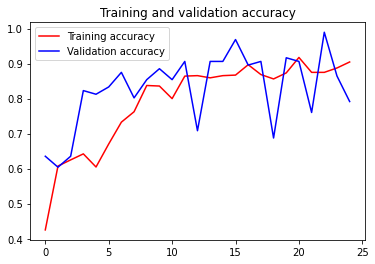

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving spot_leaf1.jpeg to spot_leaf1.jpeg
spot_leaf1.jpeg
[[0. 0. 0. 1.]]


In [0]:
# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors,
# and stored with the default serving key
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/1

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/1/assets

Saved model:
total 188
drwxr-xr-x 2 root root   4096 Jun 14 09:24 assets
-rw-r--r-- 1 root root 183424 Jun 14 09:24 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun 14 09:24 variables


In [0]:
 !pip install tensorflowjs

     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 92kB 3.6MB/s 
     |████████████████████████████████| 144.4MB 86kB/s 
     |████████████████████████████████| 256kB 39.5MB/s 
     |████████████████████████████████| 921kB 40.8MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=e3c18da8a098f1079df4fa4a3afd27b06b3e1f35d25a11b3e311904725d1e2aa
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3
  Found existing installation: tensorflow-hub 0.

In [0]:
!tensorflowjs_converter --input_format keras \
                       rps.h5 \
                       /tmp/saved_models

In [0]:
!tar -czvf /tmp/saved_models.tar.gz /tmp/saved_models

tar: Removing leading `/' from member names
/tmp/saved_models/
/tmp/saved_models/group1-shard3of13.bin
/tmp/saved_models/group1-shard9of13.bin
/tmp/saved_models/group1-shard7of13.bin
/tmp/saved_models/model.json
/tmp/saved_models/group1-shard8of13.bin
/tmp/saved_models/group1-shard2of13.bin
/tmp/saved_models/group1-shard1of13.bin
/tmp/saved_models/group1-shard13of13.bin
/tmp/saved_models/group1-shard6of13.bin
/tmp/saved_models/group1-shard4of13.bin
/tmp/saved_models/group1-shard11of13.bin
/tmp/saved_models/group1-shard10of13.bin
/tmp/saved_models/group1-shard12of13.bin
/tmp/saved_models/group1-shard5of13.bin
